#DFT calculation of Graphene

In [1]:
from ase import Atoms
from ase.io import write, read
from ase.lattice.hexagonal import *
from ase.visualize import view
from ase.units import Bohr
from gpaw import GPAW, FermiDirac, PoissonSolver, Mixer

import numpy as np

Define two graphene layers:

In [2]:
layer1 = Graphene(symbol='C',latticeconstant={'a':2.461,'c':6.708},size=(1,1,1))
layer1.center(axis=2, vacuum=8)
layer1.pbc = (True, True, False) #pbc = periodic boundary conditions
view(layer1 * (4,4,1))

layer2 = Graphite(symbol='C',latticeconstant={'a':2.461,'c':6.708},size=(1,1,1))
layer2.center(axis=2, vacuum=8)
layer2.pbc = (True, True, False) #pbc = periodic boundary conditions
view(layer2 * (4,4,1))

Define calculator parameters and perform calculations to get the potential energy and electron density

In [3]:
calc1 = GPAW(xc='LDA', 
            mode="lcao",
            kpts=(2,2,1),
            h=0.2,
            nbands=20,
            basis='dzp',
            txt='G1.txt')

calc2 = GPAW(xc='LDA', 
            mode="lcao",
            kpts=(2,2,1),
            h=0.2,
            nbands=20,
            basis='dzp',
            txt='G2.txt')

layer1.set_calculator(calc1)
layer2.set_calculator(calc2)

e1 = layer1.get_potential_energy()
e2 = layer2.get_potential_energy()

calc1.write('G1.gpw')
calc2.write('G2.gpw')

density1 = calc1.get_all_electron_density(gridrefinement=2) * Bohr**3
write('G1.cube', layer1, data=density1)
density2 = calc2.get_all_electron_density(gridrefinement=2) * Bohr**3
write('G2.cube', layer2, data=density2)
print(e1, ' eV')
print(e2, ' eV')
print(e2-2*e1, ' adhesion energy in eV')

(-20.34039771696165, ' eV')
(-40.735407862990755, ' eV')
(-0.054612429067454116, ' adhesion energy in eV')


Restart the calculation and plot DOS:

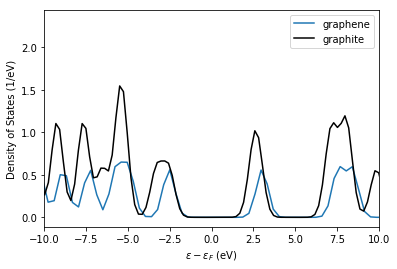

In [4]:
import sys
import matplotlib.pyplot as plt
from gpaw import GPAW

calc1 = GPAW('G1.gpw', txt=None)
calc2 = GPAW('G2.gpw', txt=None)
try:
    ef1 = calc1.get_fermi_level()
except ValueError:
    ef1 = 0
try:
    ef2 = calc2.get_fermi_level()
except ValueError:
    ef2 = 0
energy1, dos1 = calc1.get_dos(spin=0, width=0.5)
energy2, dos2 = calc2.get_dos(spin=0, width=0.5)
plt.plot(energy1 - ef1, dos1, label = "graphene")
plt.plot(energy2 - ef2, dos2, "k", label = "graphite")
plt.xlabel(r'$\epsilon - \epsilon_F \ \rm{(eV)}$')
plt.xlim([-10,10])
plt.ylabel('Density of States (1/eV)')
plt.legend()
plt.show()

Restart the calculation and plot electrostatic potential

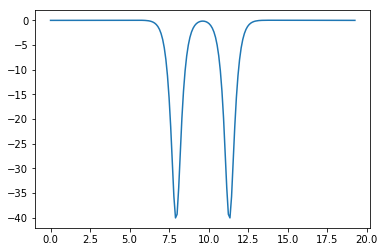

In [5]:
from ase.units import Hartree
from gpaw import GPAW
import numpy as np
import pylab as plt

calc = GPAW('G2.gpw', txt=None)
calc.restore_state()
v = (calc.hamiltonian.vHt_g * Hartree).mean(0).mean(0)
z = np.linspace(0, calc.atoms.cell[2, 2], len(v), endpoint=False)
plt.plot(z, v, label='xy-averaged potential')
plt.show()